In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

%matplotlib inline

In [2]:
voter_csv = "oldData/VOTER_Survey_December16_Release1.csv"

voter_df = pd.read_csv(voter_csv)

voter_df.head()

/Users/Hannah/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (423,564) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,case_identifier,weight,PARTY_AGENDAS_rand_2016,pp_primary16_2016,pp_demprim16_2016,pp_repprim16_2016,inputstate_2016,izip_2016,votereg2_2016,votereg_f_2016,...,post_HouseCand3Name_2012,post_HouseCand3Party_2012,post_SenCand1Name_2012,post_SenCand1Party_2012,post_SenCand2Name_2012,post_SenCand2Party_2012,post_SenCand3Name_2012,post_SenCand3Party_2012,starttime_2016,endtime_2016
0,779,0.358213,Republican Party,In the Democratic primary,Hillary Clinton,NaN,California,94952,Yes,Yes,...,NaN,NaN,Shelley Berkley,Democratic,Dean Heller,Republican,NaN,NaN,11/29/16 22:59,11/29/16 23:28
1,2108,0.562867,Republican Party,In the Republican primary,NaN,Donald Trump,Arizona,85298,Yes,Yes,...,NaN,NaN,Richard Carmona,Democratic,Jeff Flake,Republican,NaN,NaN,11/29/16 15:41,11/29/16 18:58
2,2597,0.552138,Republican Party,In the Democratic primary,Hillary Clinton,NaN,Wisconsin,54904,Yes,Yes,...,NaN,NaN,Tammy Baldwin,Democratic,Tommy Thompson,Republican,NaN,NaN,11/29/16 16:08,11/29/16 16:32
3,4148,0.207591,Democratic Party,In the Democratic primary,Someone else,NaN,Oklahoma,74104,Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/14/16 18:46,12/14/16 19:11
4,4460,0.333729,Republican Party,In the Republican primary,NaN,Marco Rubio,Texas,78253,Yes,Yes,...,NaN,NaN,Paul Sadler,Democratic,Ted Cruz,Republican,NaN,NaN,12/1/16 10:17,12/1/16 10:59


In [3]:
cleanVoter = voter_df.loc[:, ["case_identifier","inputstate_2016","healthcov2_2016","educ_2016","marstat_2016","faminc_baseline","presvote16post_2016"]]

cleanVoter = pd.DataFrame(cleanVoter).reindex()

cleanVoter.head()

,case_identifier,inputstate_2016,healthcov2_2016,educ_2016,marstat_2016,faminc_baseline,presvote16post_2016
0,779,California,"I'm covered by a government plan, such as Medi...",4-year,Widowed,"$50,000 - $59,999",Hillary Clinton
1,2108,Arizona,I have private insurance or belong to an HMO.,Some college,Married,"$70,000 - $79,999",Donald Trump
2,2597,Wisconsin,"I'm covered by a government plan, such as Medi...",High school graduate,Single,"$40,000 - $49,999",Hillary Clinton
3,4148,Oklahoma,I have private insurance or belong to an HMO.,Some college,Divorced,"$80,000 - $99,999",Gary Johnson
4,4460,Texas,Other,4-year,Married,"$100,000 - $119,999",Donald Trump


In [4]:
cleanVoter.to_csv('cleanVoter.csv')

In [5]:
cleanVoter_csv = "cleanVoter.csv"

cleanVoter_df = pd.read_csv(cleanVoter_csv)

cleanVoter_df.head()

,Unnamed: 0,case_identifier,inputstate_2016,healthcov2_2016,educ_2016,marstat_2016,faminc_baseline,presvote16post_2016
0,0,779,California,"I'm covered by a government plan, such as Medi...",4-year,Widowed,"$50,000 - $59,999",Hillary Clinton
1,1,2108,Arizona,I have private insurance or belong to an HMO.,Some college,Married,"$70,000 - $79,999",Donald Trump
2,2,2597,Wisconsin,"I'm covered by a government plan, such as Medi...",High school graduate,Single,"$40,000 - $49,999",Hillary Clinton
3,3,4148,Oklahoma,I have private insurance or belong to an HMO.,Some college,Divorced,"$80,000 - $99,999",Gary Johnson
4,4,4460,Texas,Other,4-year,Married,"$100,000 - $119,999",Donald Trump


In [6]:
cleanVoter2 = cleanVoter.reset_index(drop=True)
cleanVoter2.head()

,case_identifier,inputstate_2016,healthcov2_2016,educ_2016,marstat_2016,faminc_baseline,presvote16post_2016
0,779,California,"I'm covered by a government plan, such as Medi...",4-year,Widowed,"$50,000 - $59,999",Hillary Clinton
1,2108,Arizona,I have private insurance or belong to an HMO.,Some college,Married,"$70,000 - $79,999",Donald Trump
2,2597,Wisconsin,"I'm covered by a government plan, such as Medi...",High school graduate,Single,"$40,000 - $49,999",Hillary Clinton
3,4148,Oklahoma,I have private insurance or belong to an HMO.,Some college,Divorced,"$80,000 - $99,999",Gary Johnson
4,4460,Texas,Other,4-year,Married,"$100,000 - $119,999",Donald Trump


In [7]:
cleanVoter2 = cleanVoter2.rename(columns={"case_identifier": "Case ID",
                           "inputstate_2016": "State",
                           "healthcov2_2016": "Health Care",
                           "educ_2016": "Education",
                           "marstat_2016": "Marital Status",
                           "faminc_baseline": "Household Income",
                           "presvote16post_2016": "Candidate Voted For"})
cleanVoter2

,Case ID,State,Health Care,Education,Marital Status,Household Income,Candidate Voted For
0,779,California,"I'm covered by a government plan, such as Medi...",4-year,Widowed,"$50,000 - $59,999",Hillary Clinton
1,2108,Arizona,I have private insurance or belong to an HMO.,Some college,Married,"$70,000 - $79,999",Donald Trump
2,2597,Wisconsin,"I'm covered by a government plan, such as Medi...",High school graduate,Single,"$40,000 - $49,999",Hillary Clinton
3,4148,Oklahoma,I have private insurance or belong to an HMO.,Some college,Divorced,"$80,000 - $99,999",Gary Johnson
4,4460,Texas,Other,4-year,Married,"$100,000 - $119,999",Donald Trump
...,...,...,...,...,...,...,...
7995,135782552,Texas,"I'm covered by a government plan, such as Medi...",High school graduate,Widowed,"Less than $10,000",Hillary Clinton
7996,135805694,Minnesota,I have private insurance or belong to an HMO.,Some college,Married,"$100,000 - $119,999",Donald Trump
7997,135805937,Montana,"I'm covered by a government plan, such as Medi...",High school graduate,Widowed,"$10,000 - $19,999",Donald Trump
7998,136343363,Massachusetts,I have private insurance or belong to an HMO.,High school graduate,Married,"$100,000 - $119,999",Donald Trump


In [8]:
cleanVoter2.count()

Case ID                8000
State                  8000
Health Care            7424
Education              8000
Marital Status         7998
Household Income       7937
Candidate Voted For    7606
dtype: int64

In [9]:
cleanVoter2 = cleanVoter2.dropna(how = "any")
cleanVoter2.count()

Case ID                7038
State                  7038
Health Care            7038
Education              7038
Marital Status         7038
Household Income       7038
Candidate Voted For    7038
dtype: int64

In [10]:
cleanVoter2['Candidate Voted For'].unique()

array(['Hillary Clinton', 'Donald Trump', 'Gary Johnson', 'Other',
       'Jill Stein', 'Evan McMullin', 'Did not vote for President'],
      dtype=object)

In [11]:
cleanVoter2['Marital Status'].unique()

array(['Widowed', 'Married', 'Single', 'Divorced', 'Domestic partnership',
       'Separated'], dtype=object)

In [12]:
Group_By_Candidate = cleanVoter2.set_index('Candidate Voted For').groupby(['Candidate Voted For'])

In [13]:
HC = cleanVoter2.loc[cleanVoter2['Candidate Voted For'] == 'Hillary Clinton'].groupby('Marital Status')["Case ID"].count()
DT = cleanVoter2.loc[cleanVoter2['Candidate Voted For'] == 'Donald Trump'].groupby('Marital Status')["Case ID"].count()
marital_status = pd.DataFrame({"Hillary Clinton": HC,
                           "Donald Trump": DT})

marital_status = marital_status[['Hillary Clinton','Donald Trump']]
marital_status.index.name = "Marital Status"
marital_status

,Hillary Clinton,Donald Trump
Marital Status,,
Divorced,427,345
Domestic partnership,137,57
Married,1824,2220
Separated,48,31
Single,656,312
Widowed,222,240


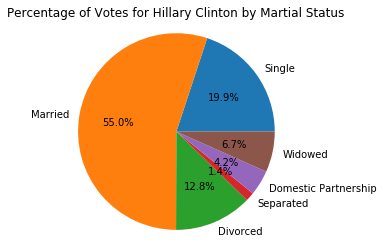

In [14]:
labels = 'Single','Married','Divorced','Separated','Domestic Partnership','Widowed'
values = [666, 1838, 427, 48, 139, 223]

fig1, ax1 = plt.subplots()
plt.title("Percentage of Votes for Hillary Clinton by Martial Status")
ax1.pie(values, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.savefig("Percentage of Votes for Hillary Clinton by Martial Status")
plt.show()

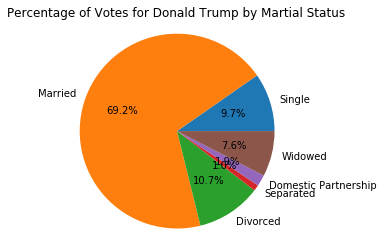

In [15]:
labels = 'Single','Married','Divorced','Separated','Domestic Partnership','Widowed'
values = [313, 2233, 347, 32, 60, 244]

fig1, ax1 = plt.subplots()
plt.title("Percentage of Votes for Donald Trump by Martial Status")
ax1.pie(values, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.savefig("Percentage of Votes for Donald Trump by Martial Status")
plt.show()

In [16]:
cleanVoter2['Education'].unique()

array(['4-year', 'Some college', 'High school graduate', '2-year',
       'Post-grad', 'No HS'], dtype=object)

In [17]:
HC = cleanVoter2.loc[cleanVoter2['Candidate Voted For'] == 'Hillary Clinton'].groupby('Education')["Case ID"].count()
DT = cleanVoter2.loc[cleanVoter2['Candidate Voted For'] == 'Donald Trump'].groupby('Education')["Case ID"].count()
educational_attainment = pd.DataFrame({"Hillary Clinton": HC,
                           "Donald Trump": DT})

educational_attainment = educational_attainment[['Hillary Clinton','Donald Trump']]
educational_attainment.index.name = "Education"
educational_attainment

,Hillary Clinton,Donald Trump
Education,,
2-year,335,367
4-year,920,734
High school graduate,599,895
No HS,35,77
Post-grad,701,440
Some college,724,692


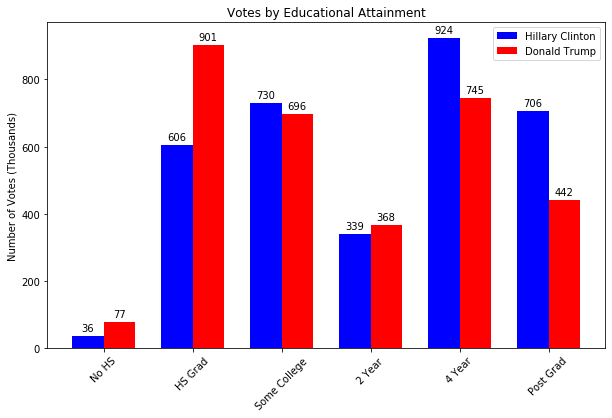

In [19]:
labels = ['No HS', 'HS Grad', 'Some College', '2 Year', '4 Year', 'Post Grad']
hillary_values = [36, 606, 730, 339, 924, 706]
donald_values = [77, 901, 696, 368, 745, 442]


x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, hillary_values, width, label='Hillary Clinton', color="blue")
rects2 = ax.bar(x + width/2, donald_values, width, label='Donald Trump', color="red")


ax.set_ylabel('Number of Votes (Thousands)')
ax.set_title('Votes by Educational Attainment')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend(loc="best")

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

plt.rcParams['figure.figsize'] = (10,6)

plt.savefig("Votes by Educational Attainment")
plt.show()


In [20]:
HC = cleanVoter2.loc[cleanVoter2['Candidate Voted For'] == 'Hillary Clinton'].groupby('Household Income')["Case ID"].count()
DT = cleanVoter2.loc[cleanVoter2['Candidate Voted For'] == 'Donald Trump'].groupby('Household Income')["Case ID"].count()
household_income = pd.DataFrame({"Hillary Clinton": HC,
                           "Donald Trump": DT})

household_income = household_income[['Hillary Clinton','Donald Trump']]
household_income.index.name = "Household Income"
household_income

,Hillary Clinton,Donald Trump
Household Income,,
"$10,000 - $19,999",217,140
"$100,000 - $119,999",240,216
"$120,000 - $149,999",231,186
"$150,000 or more",237,198
"$20,000 - $29,999",286,260
"$30,000 - $39,999",304,307
"$40,000 - $49,999",299,299
"$50,000 - $59,999",262,308
"$60,000 - $69,999",223,266


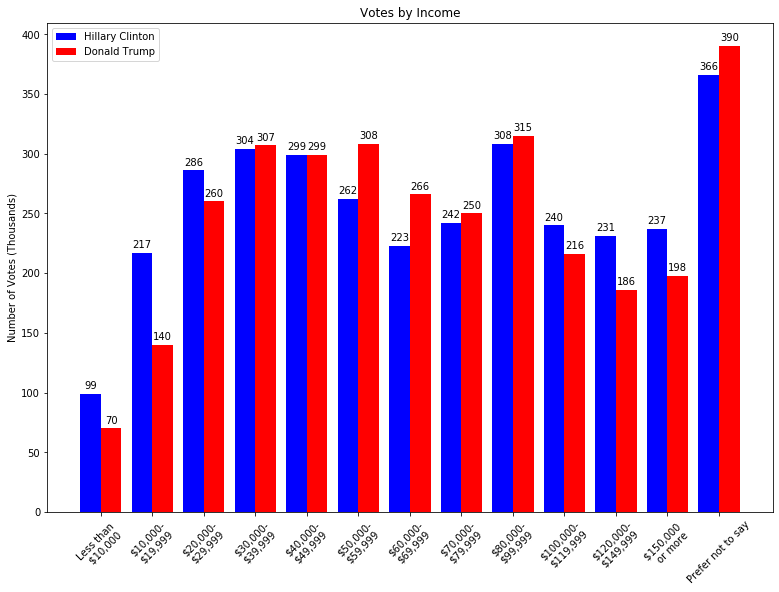

In [22]:
labels = ['Less than \n $10,000', '$10,000-\n$19,999', '$20,000-\n$29,999', '$30,000-\n$39,999',
          '$40,000-\n$49,999', '$50,000-\n$59,999', '$60,000-\n$69,999', '$70,000-\n$79,999', '$80,000-\n$99,999',
          '$100,000-\n$119,999', '$120,000-\n$149,999', '$150,000 \n or more', 'Prefer not to say']
hillary_values = [99, 217, 286, 304, 299,262,223,242,308,240,231,237,366]
donald_values = [70,140,260,307,299,308,266,250,315,216,186,198,390]
x = np.arange(len(labels))
width = 0.4
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, hillary_values, width, label='Hillary Clinton', color="blue")
rects2 = ax.bar(x + width/2, donald_values, width, label='Donald Trump', color="red")
ax.set_ylabel('Number of Votes (Thousands)')
ax.set_title('Votes by Income')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend(loc="best")
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
plt.rcParams['figure.figsize'] = (13,9)
plt.savefig("Votes by Income Bargraph")
plt.show()

In [23]:
cleanVoter2['Health Care'].unique()

array(["I'm covered by a government plan, such as Medicare or Medicaid.",
       'I have private insurance or belong to an HMO.', 'Other',
       "Don't know"], dtype=object)

In [24]:
HC = cleanVoter2.loc[cleanVoter2['Candidate Voted For'] == 'Hillary Clinton'].groupby('Health Care')["Case ID"].count()
DT = cleanVoter2.loc[cleanVoter2['Candidate Voted For'] == 'Donald Trump'].groupby('Health Care')["Case ID"].count()
health_care = pd.DataFrame({"Hillary Clinton": HC,
                           "Donald Trump": DT})




# household_income = household_income.sort_values(['Household Income'], ascending=False)

health_care = health_care[['Hillary Clinton','Donald Trump']]
health_care.index.name = "Health Care"
health_care.count

<bound method DataFrame.count of                                                     Hillary Clinton  \
Health Care                                                           
Don't know                                                       19   
I have private insurance or belong to an HMO.                  1842   
I'm covered by a government plan, such as Medic...             1256   
Other                                                           197   

                                                    Donald Trump  
Health Care                                                       
Don't know                                                    33  
I have private insurance or belong to an HMO.               1720  
I'm covered by a government plan, such as Medic...          1199  
Other                                                        253  >

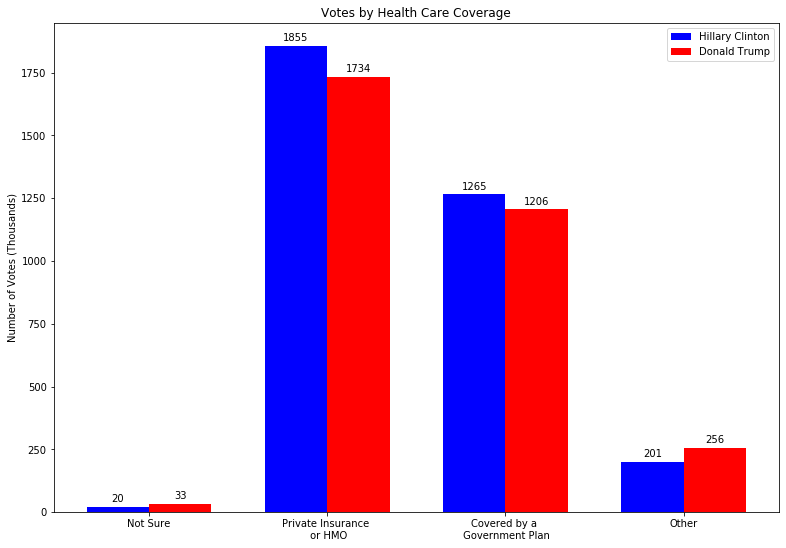

In [25]:
labels = ['Not Sure', 'Private Insurance \n or HMO', 'Covered by a \n Government Plan', 'Other']
hillary_values = [20, 1855, 1265, 201]
donald_values = [33, 1734, 1206, 256]


x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, hillary_values, width, label='Hillary Clinton', color="blue")
rects2 = ax.bar(x + width/2, donald_values, width, label='Donald Trump', color="red")


ax.set_ylabel('Number of Votes (Thousands)')
ax.set_title('Votes by Health Care Coverage')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc="best")

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

plt.rcParams['figure.figsize'] = (10,6)

plt.savefig("Votes by Health Care Coverage")
plt.show()

In [26]:
HC = cleanVoter2.loc[cleanVoter2['Candidate Voted For'] == 'Hillary Clinton'].groupby('State')["Case ID"].count()
DT = cleanVoter2.loc[cleanVoter2['Candidate Voted For'] == 'Donald Trump'].groupby('State')["Case ID"].count()
state = pd.DataFrame({"Hillary Clinton": HC,
                           "Donald Trump": DT})




# household_income = household_income.sort_values(['Household Income'], ascending=False)

state = state[['Hillary Clinton','Donald Trump']]
state.index.name = "state"
#show the dataframe
state

,Hillary Clinton,Donald Trump
state,,
Alabama,35,29
Alaska,11,7
Arizona,76,108
Arkansas,22,36
California,397,289
Colorado,65,59
Connecticut,32,26
Delaware,22,6
District of Columbia,14,2


In [27]:
state["Winner"] = np.where(state['Hillary Clinton']>=state['Donald Trump'], 'Democrat', 'Republican')

state["Winner"]

state
Alabama                   Democrat
Alaska                    Democrat
Arizona                 Republican
Arkansas                Republican
California                Democrat
Colorado                  Democrat
Connecticut               Democrat
Delaware                  Democrat
District of Columbia      Democrat
Florida                 Republican
Georgia                 Republican
Hawaii                    Democrat
Idaho                   Republican
Illinois                  Democrat
Indiana                   Democrat
Iowa                      Democrat
Kansas                  Republican
Kentucky                Republican
Louisiana               Republican
Maine                     Democrat
Maryland                  Democrat
Massachusetts             Democrat
Michigan                  Democrat
Minnesota               Republican
Mississippi             Republican
Missouri                Republican
Montana                 Republican
Nebraska                Republican
Nevada        

In [28]:
Republican = state.loc[state['Winner'] == 'Republican'].count()
Democrat = state.loc[state['Winner'] == 'Democrat'].count()

state_winner = pd.DataFrame({"Repbulican": Republican,
                           "Democrat": Democrat})

state_winner

,Repbulican,Democrat
Hillary Clinton,27,24
Donald Trump,27,24
Winner,27,24


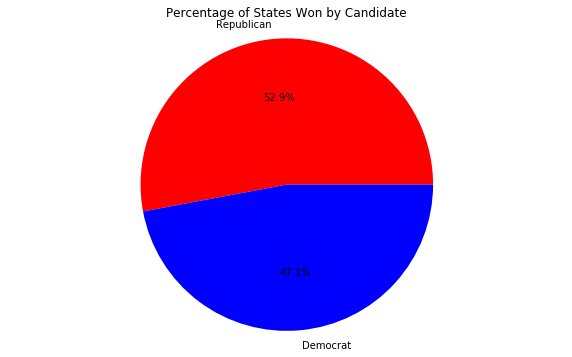

In [29]:
labels = 'Republican','Democrat'
values = [27, 24]
colors = ["red", "blue"]



fig1, ax1 = plt.subplots()
plt.title("Percentage of States Won by Candidate")
ax1.pie(values, labels=labels, autopct='%1.1f%%', colors=colors)
ax1.axis('equal')
plt.savefig("Percentage of States Won by Candidate")
plt.show()